*Pre-requisite:* install some modules

In [ ]:
%pip install -U ipympl

# Matplotlib

### Let's start with a simple problem...

> **You have a function, that generates a number from 0 to 1 randomly. Calculate π**

Create an approximate solution in your head, using paper or whiteboard. Uncover the hints as you go:

<details>
    <summary><em>Hint 1</em></summary>
    The number π is bound to a circle (how?). What is we have a circle...
</details>
<br><br>

<details>
    <summary><em>Hint 2</em></summary>
    If we know the area of a circle, we can calculate π: S = π * r^2 => π = S / r^2
</details>
<br><br>

<details>
    <summary><em>Hint 3</em></summary>
    How can we get an area of a circle? Let's draw a circle centered in (0, 0) with radius r = 1 on a coordinate plane.
    <br><br>
    Let's consider positive numbers (e.i. the first quadrant).
    <br>If we know the area of the first quadrant of a circle, we can calculate the area of the whole circle: S = 4 * S1_circle, in other words, π = S / r^2 = 4 * S1_circle / r^2 = 4 * S1_circle (since r = 1)
</details>
<br><br>

<details>
    <summary><em>Hint 4</em></summary>
    If we have a function, that generates random numbers from 0 to 1, we can generate a random point in a square (0,0) to (1,1). This square's area is 1 * 1 = 1
</details>

<!-- <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br> -->

#### Solution:
- We generate a bunch of random points in a square $(0,0)$ to $(1,1)$.
- We count how many of them are inside a circle centered in $(0,0)$ with radius $1$.
- The ratio of points inside the circle to all points in a square $(0,0)$ to $(1,1)$ will be equal to the ratio of the area of the circle in the first quadrant to the area of the square in the first quadrant

$$
\frac{\text{point}\_\text{in}\_\text{circle}}{\text{points}\_\text{in}\_\text{square}}
= \frac{S1_\text{circle}}{S1_\text{square}}
= \frac{S1_\text{circle}}{1 \cdot 1}
= S1_\text{circle}
$$
$$
π
= \frac{S}{r^2}
= \frac{S}{1^2}
= S
= 4 \cdot S1_\text{circle} = 4 \cdot \frac{\text{point}\_\text{in}\_\text{circle}}{\text{points}\_\text{in}\_\text{square}}
$$

### Let's draw this!

Using `matplotlib`, draw a circle and a square. Bound the image to the square $(0,0)$ to $(1,1)$

Follow the steps, execute the code after each step:

1. Use [`pyplot.title({title})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html) to set the title of the plot
2. Use [`pyplot.show()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html) to display the empty plot
3. Use [`pyplot.Circle({center}, {radius}, color={color}, fill=False, linewidth={})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Circle.html) to create a circle
4. Use [`pyplot.gca().add_patch({object})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html) to add a circle to the plot
5. Use [`pyplot.Rectangle({left_bottom}, {width}, {height}, color={color}, fill=False, linewidth={})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.Rectangle.html) to create a square
6. Use [`pyplot.gca().add_patch({object})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.add_patch.html) to add a circle to the plot
7. Use [`pyplot.xlim({left}, {right})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlim.html) and [`pyplot.ylim({bottom}, {top})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.ylim.html) to set the bounds of the plot
8. Use [`pyplot.gca().set_aspect('equal')`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_aspect.html) to set the aspect ratio of the plot

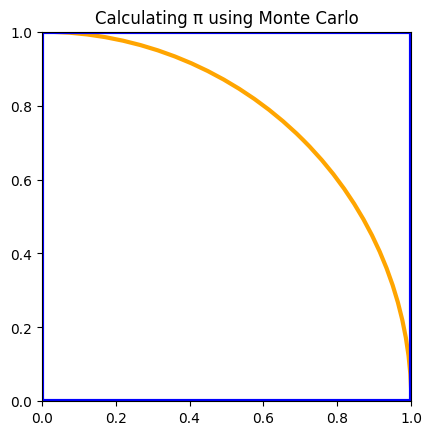

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt


plt.title('Calculating π using Monte Carlo')

circle = plt.Circle((0, 0), 1, color='orange', fill=False, linewidth=3)
plt.gca().add_patch(circle)

square = plt.Rectangle((0, 0), 1, 1, color='blue', fill=False, linewidth=3)
plt.gca().add_patch(square)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')

plt.show()

<!-- <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br> -->

Now let's draw some random points on our plot:

- Use [`numpy.random.random({size})`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.random.html) to generate and array of random numbers from 0 to 1
- Use [`pyplot.scatter({x}, {y}, color={color}, s={size})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) to draw a scatter plot

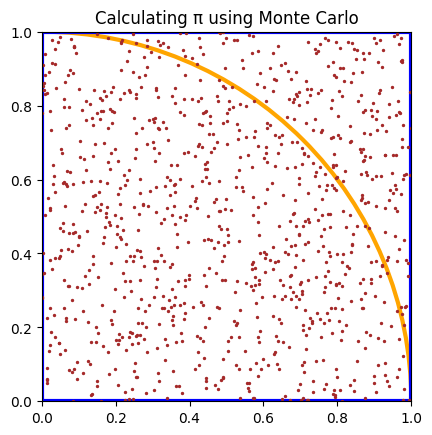

In [2]:
%matplotlib inline
from numpy.random import random
import matplotlib.pyplot as plt


SAMPLES = 1000  # You can play with the number of samples


circle = plt.Circle((0, 0), 1, color='orange', fill=False, linewidth=3)
square = plt.Rectangle((0, 0), 1, 1, color='blue', fill=False, linewidth=3)

plt.gca().add_patch(circle)
plt.gca().add_patch(square)

plt.xlim(0, 1)
plt.ylim(0, 1)
plt.gca().set_aspect('equal')
plt.title('Calculating π using Monte Carlo')

plt.scatter(random(SAMPLES), random(SAMPLES), color='brown', s=2)

plt.show()

<!-- <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br> -->

For now we are drawing all the points at once. Let's draw them one by one and animate the process:

- Use [`pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to split the plot object into the figure and the axes objects
- Use [`matplotlib.animation.FuncAnimation({figure}, {function}, frames={amount_of_frames}, interval={interval_in_ms})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.animation.FuncAnimation.html) to animate the plot
- Use `{scatter_plot}.set_offsets({points})` to update the scatter plot with new set of points

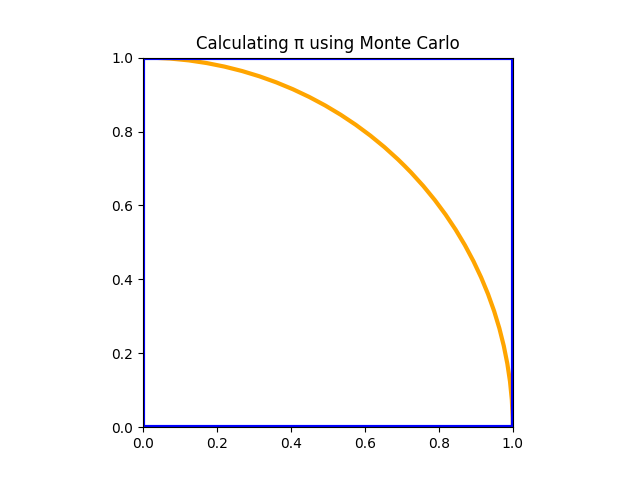

In [4]:
%matplotlib ipympl
from numpy.random import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


SAMPLES = 100

# Set up the figure and axis
fig, ax = plt.subplots()

circle = plt.Circle((0, 0), 1, color='orange', fill=False, linewidth=3)
square = plt.Rectangle((0, 0), 1, 1, color='blue', fill=False, linewidth=3)
ax.add_patch(circle)
ax.add_patch(square)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_title('Calculating π using Monte Carlo')

points = ax.scatter([], [], color='brown', s=5)
xs = []
ys = []

# A function to update the plot on each frame
def update(frame):
    xs.append(random())
    ys.append(random())
    points.set_offsets(list(zip(xs, ys)))

    # Alternative way (slower): draw a new scatter plot consisting of one point
    # ax.scatter([random()], [random()], color='brown', s=5)

ani = FuncAnimation(fig, update, frames=SAMPLES, repeat=False, interval=100)

plt.show()

<!-- <br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br> -->

Now let's add our π calculation:

- Store the amount of points inside the circle in a variable
- Increment the variable if the new point is inside the circle
- Calculate π using the formula
- Output the value of π to the plot's title

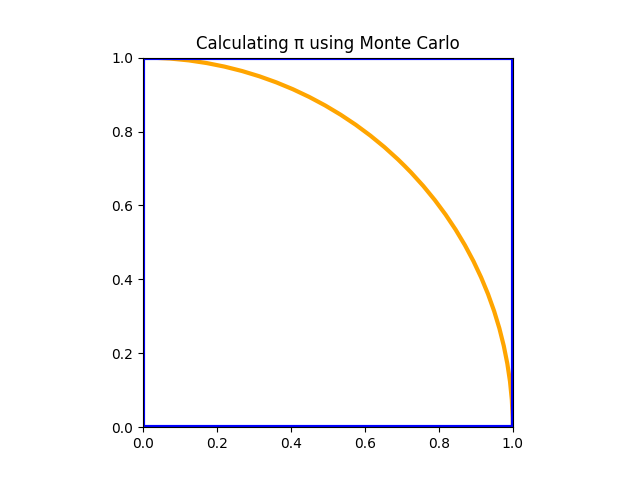

In [5]:
%matplotlib ipympl
from numpy.random import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


SAMPLES = 100


def calculate_pi(in_circle: int, total: int) -> float:
    return 4 * points_in_circle / total

fig, ax = plt.subplots()

circle = plt.Circle((0, 0), 1, color='orange', fill=False, linewidth=3)
square = plt.Rectangle((0, 0), 1, 1, color='blue', fill=False, linewidth=3)
ax.add_patch(circle)
ax.add_patch(square)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.set_title('Calculating π using Monte Carlo')

points = ax.scatter([], [], color='brown', s=5)
xs = []
ys = []

points_in_circle = 0

def update(frame):
    global points_in_circle

    x = random()
    y = random()

    xs.append(x)
    ys.append(y)
    points.set_offsets(list(zip(xs, ys)))

    if x**2 + y**2 <= 1:
        points_in_circle += 1

    ax.set_title(f'π = {calculate_pi(points_in_circle, frame + 1):.5f}')

ani = FuncAnimation(fig, update, frames=SAMPLES, repeat=False, interval=100)

plt.show()

### Enough madness, let's do something simple

Draw a bar graph / histogram of:
- The first 10 Fibonacci numbers
- Normal distribution

<br>

- Use [`pyplot.bar({x}, {height}, color={color})`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) to draw a bar graph
- Use [`pyplot.hist({x}, bins={bins}, density=True, color='green')`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) to draw a histogram

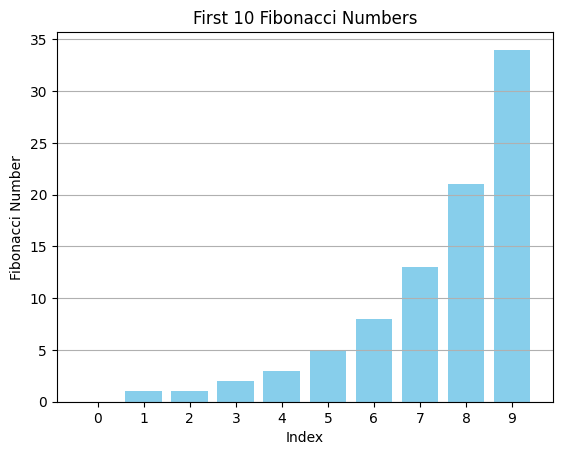

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt


# Step 1: Generate the first 10 Fibonacci numbers
fibonacci_numbers = [0, 1]
for i in range(2, 10):
    fibonacci_numbers.append(fibonacci_numbers[i - 1] + fibonacci_numbers[i - 2])

# Step 2: Plotting the Fibonacci numbers
plt.bar(range(10), fibonacci_numbers, color='skyblue')
plt.title('First 10 Fibonacci Numbers')
plt.xlabel('Index')
plt.ylabel('Fibonacci Number')
plt.xticks(range(10))  # Setting the x-ticks to be the indices
plt.grid(axis='y')
plt.show()

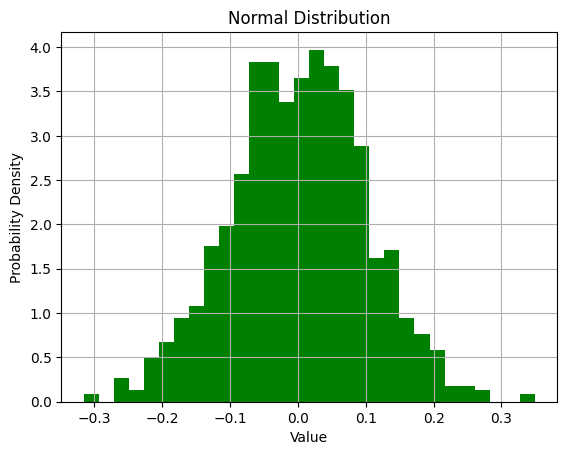

In [8]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


# Step 1: Generate random data for normal distribution
mu, sigma = 0, 0.1  # mean and standard deviation
data = np.random.normal(mu, sigma, 1000)  # Generate 1000 random samples (play with this number)

# Step 2: Plotting the normal distribution (play with the number of bins)
plt.hist(data, bins=30, density=True, color='green')

plt.title('Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid()
plt.show()